1. We will start by connecting to Kaggle using Kaggle API which can be downloaded from your kaggle account's settings and uploading it to Colab

In [ ]:
# 1 run this cell and select kaggle.json file download form the a kaggle account settings pages
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dermotkeaney","key":"9657a6ed70685537f780768013d27606"}'}

2. Installing kaggle api using pip

In [ ]:
# Next install the kaggle API client
!pip install -q kaggle


3. Installing kaggle api using pip

In [ ]:
# The Kaggle API client expects this file to be in  ~/.kaggle,so move it there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change aviods a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

4. To store the data we will create a new directory and make it as current working directory

In [ ]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


5. Searching Kaggle for the required dataset using search option(-s) with title 'gtsrb-german-traffic-sign

In [ ]:
# Searching for dataset

!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          99486       1061  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          13019        277  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            499         30  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

6. After searching the data next step would be downloading the data into collab notebook using references found in search option

In [ ]:
#Downloading dataset and coming out of directory

!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 612M/612M [00:07<00:00, 136MB/s]
100% 612M/612M [00:07<00:00, 85.3MB/s]
/content


7. We will unzip the data which is downloaded and remove the irrelevant files

In [ ]:
# Unzipping downloaded file and removing the ususable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
#!rm -rf traffic_sign_dataset/Meta
#!rm -rf traffic_sign_dataset/meta
#!rm -rf traffic_sign_dataset/test
#!rm -rf traffic_sign_dataset/train
#!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

8. Visualizing some images of traffic sign from the test dataset. we can see here that the dimension of images are uneven.


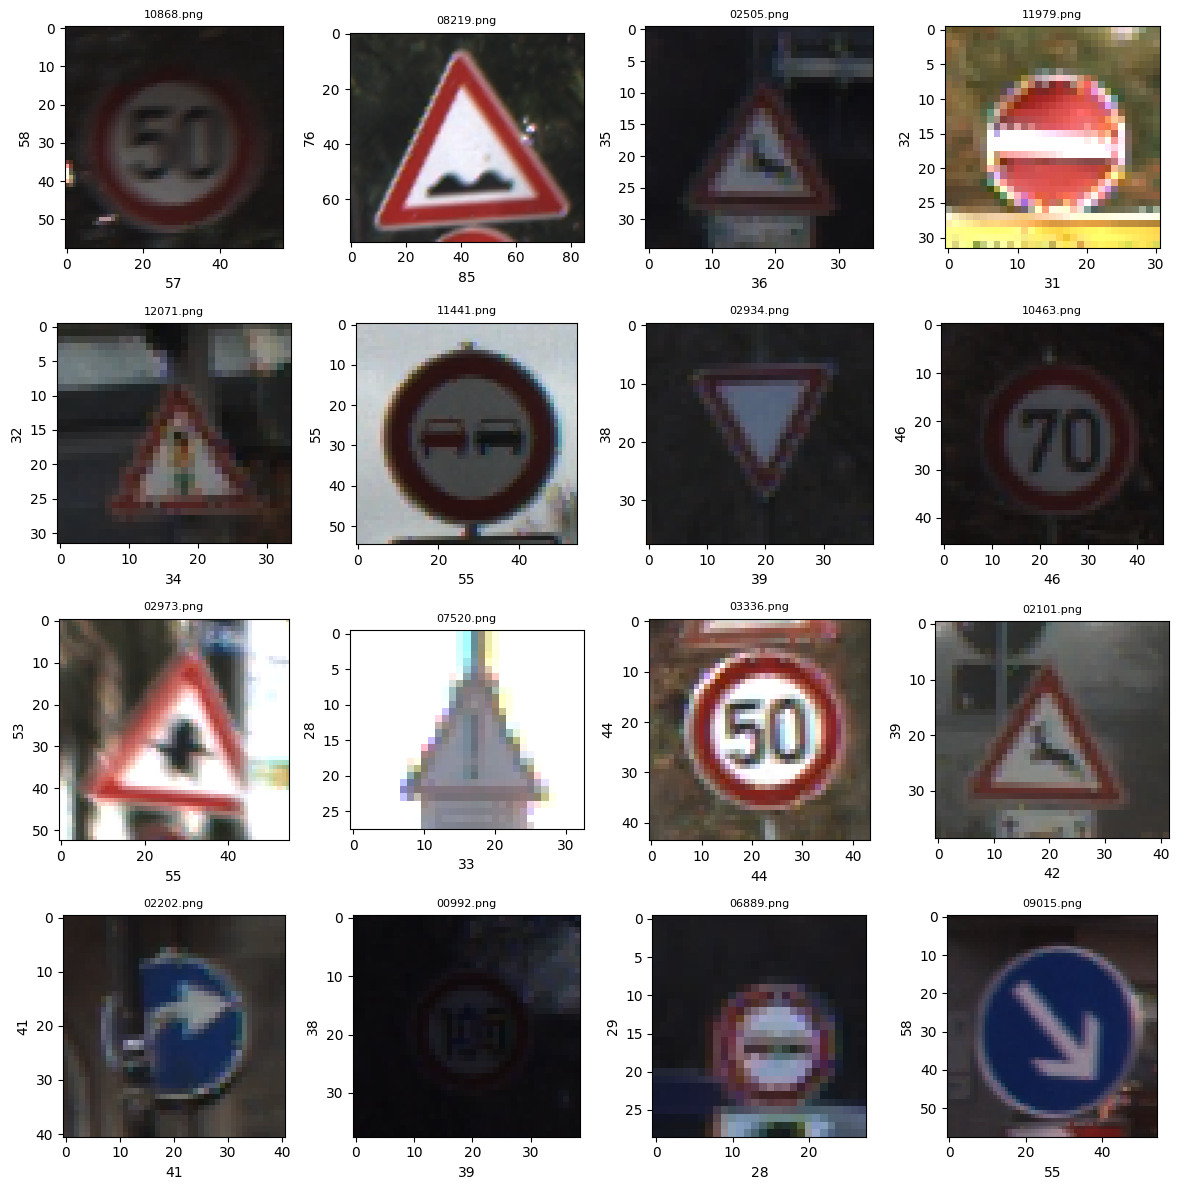

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

# Plotting 12 images to check dataset
plt.figure(figsize=(12, 12))
path = "traffic_sign_dataset/Test"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()

    # Get a random image file from the directory
    file_name = random.choice(sorted(os.listdir(path)))
    img_path = os.path.join(path, file_name)

    # Read and display the image
    rand_img = imread(img_path)
    plt.imshow(rand_img)

    # Include file name as a title
    plt.title(file_name, fontsize=8)

    plt.xlabel(rand_img.shape[1], fontsize=10)  # width of the image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # height of the image

plt.show()


9. Add the VVG16 pre-trained model to the notebook

In [ ]:
from keras.applications.vgg16 import VGG16

model=VGG16()

model.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

10. Load the test images and Test the VGG16 model against the test images

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from PIL import Image
import numpy as np

# Load VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')

# Load and preprocess the image
img_path = 'traffic_sign_dataset/Test/08219.png'
img = Image.open(img_path)
img = img.resize((224, 224))  # Resize the image to 224x224
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")



1/1 [==============================] - 0s 148ms/step
1: street_sign (0.39)
2: shield (0.08)
3: traffic_light (0.08)
4: maze (0.03)
5: bottlecap (0.03)


Conclusion

The VGG16 pretrained model is able to predict at a low level what the image is